In [241]:
!pip install fitter

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 62.5/62.5 kB 2.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11.6/11.6 MB 57.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [10]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import scipy.stats as st
from scipy.stats._continuous_distns import _distn_names
from sympy.plotting import plot
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import sympy
from sympy import symbols, exp, oo
from sympy.functions.elementary.complexes import sign
from fitter import Fitter

In [2]:
# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))

        except Exception:
            pass


    return sorted(best_distributions, key=lambda x:x[2])

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# ÊØîËµõ‰∫∫Êï∞Ê®°Âûã

  1 / 106: ksone
  2 / 106: kstwo
  3 / 106: kstwobign
  4 / 106: norm
  5 / 106: alpha
  6 / 106: anglit
  7 / 106: arcsine
  8 / 106: beta
  9 / 106: betaprime
 10 / 106: bradford
 11 / 106: burr
 12 / 106: burr12
 13 / 106: fisk
 14 / 106: cauchy
 15 / 106: chi
 16 / 106: chi2
 17 / 106: cosine
 18 / 106: dgamma
 19 / 106: dweibull
 20 / 106: expon
 21 / 106: exponnorm
 22 / 106: exponweib
 23 / 106: exponpow
 24 / 106: fatiguelife
 25 / 106: foldcauchy
 26 / 106: f
 27 / 106: foldnorm
 28 / 106: weibull_min
 29 / 106: truncweibull_min
 30 / 106: weibull_max
 31 / 106: genlogistic
 32 / 106: genpareto
 33 / 106: genexpon
 34 / 106: genextreme
 35 / 106: gamma
 36 / 106: erlang
 37 / 106: gengamma
 38 / 106: genhalflogistic
 39 / 106: genhyperbolic
 40 / 106: gompertz
 41 / 106: gumbel_r
 42 / 106: gumbel_l
 43 / 106: halfcauchy
 44 / 106: halflogistic
 45 / 106: halfnorm
 46 / 106: hypsecant
 47 / 106: gausshyper
 48 / 106: invgamma
 49 / 106: invgauss
 50 / 106: geninvgauss
 51 / 1

Text(0.5, 1.0, 'laplace_asymmetric(kappa=0.51, loc=100.00, scale=83.32)')

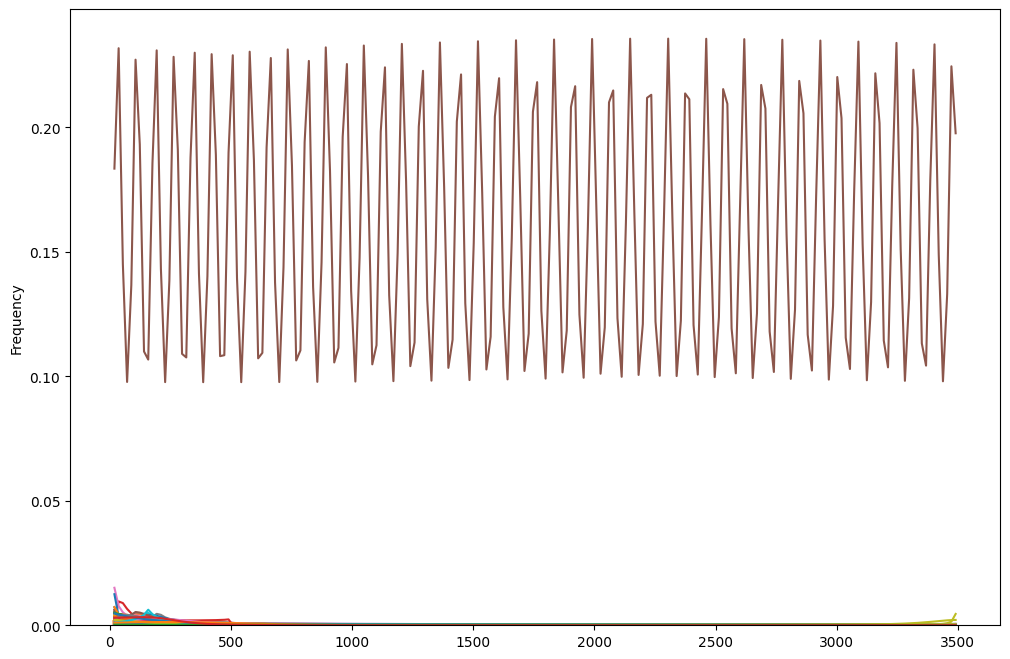

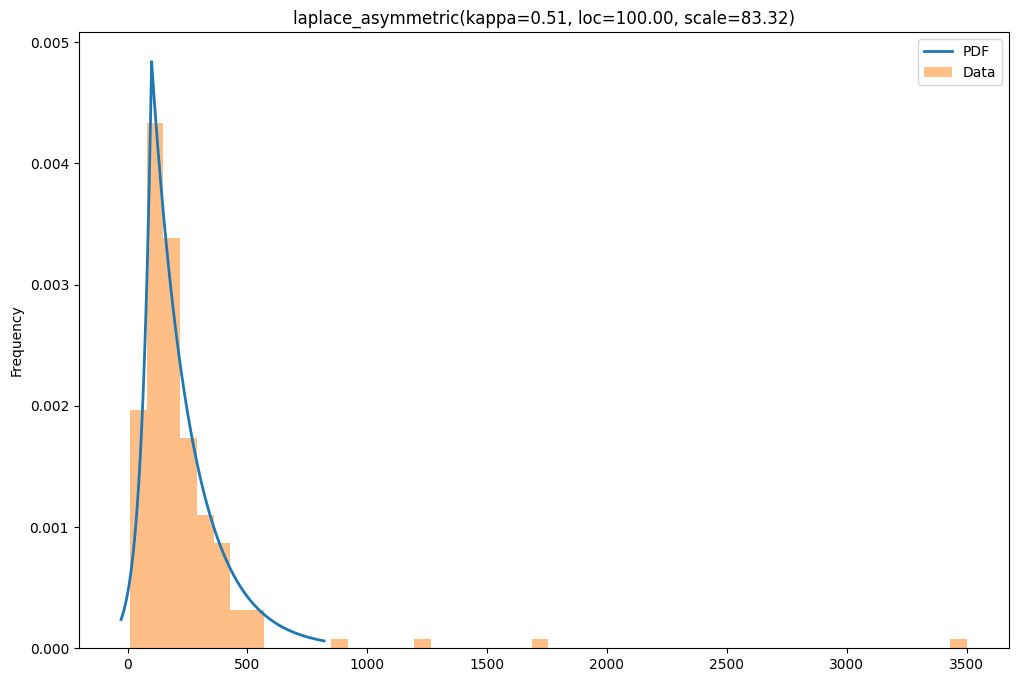

In [204]:
df = pd.read_csv('data.csv')

def numberic(x):
    if type(x) is str and '-' in x:
        a, b = x.split('-')
        a, b = int(a), int(b)
        return (a + b) / 2
    elif type(x) is str:
      return int(''.join(c for c in x if c.isdigit()))
    else:
      return x

# Clean up data
data = pd.Series([numberic(x) for x in df['ÂèÇËµõ‰∫∫Êï∞']])
data = data[data.notnull()]

# Remove outlier
# data = data[np.abs(stats.zscore(data)) < 3]

# # Plot original
# ax = data.hist(bins=20, grid=False)
# ax.set_xlim(0, 500)
# plt.xticks(np.arange(0, 500, 50))
# ax.plot()

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_distibutions = best_fit_distribution(data, 200, ax)
best_dist = best_distibutions[0]

# Make PDF with best params
pdf = make_pdf(best_dist[0], best_dist[1])

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)

ax.set_title(dist_str)


ÂèØÂæóÔºå2023Âπ¥ÊØîËµõ‰∫∫Êï∞ÂàÜÂ∏ÉËøë‰ºº‰∏∫**ÈùûÂØπÁß∞ÊãâÊôÆÊãâÊñØÂàÜÂ∏É**„ÄÇÂèÇÊï∞‰∏∫

```
Œ∫ = 0.1
ùíé = 100
Œª = 83.32
```

$$
f(x; m,\lambda,\kappa)=(\frac{1}{\kappa+\kappa^{-1}}) e^{-sy\kappa^{s}}, y = \frac{x-m}{\lambda}, s=sgn(y)
$$

In [31]:
kappa = 0.51
loc = 100
scale = 83.32

dist = st.laplace_asymmetric(kappa = kappa, loc = loc, scale = scale)
mean = dist.expect()
print(mean)

220.87934900297162


ÊØèÂú∫ÂèÇËµõ‰∫∫Êï∞Êï∞Â≠¶ÊúüÊúõÁ∫¶ 221 ‰∫∫

In [32]:
x = symbols('x') # x‰∏∫‰∫∫Êï∞

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.laplace_asymmetric.html#scipy.stats.laplace_asymmetric
y = (x - loc) / scale
s = sign(y)
f_number_of_participants = (1 / (kappa + 1 / kappa)) * exp(-s * y * kappa ** s) / scale

f_number_of_participants

0.00485753460574325*exp(-0.51**sign(0.0120019203072492*x - 1.20019203072492)*(0.0120019203072492*x - 1.20019203072492)*sign(0.0120019203072492*x - 1.20019203072492))

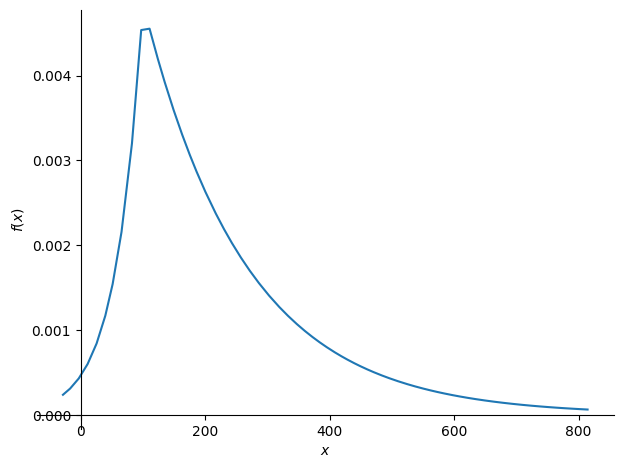

In [207]:
from sympy.plotting import plot
min = st.laplace_asymmetric.ppf(0.01, kappa, loc = loc, scale = scale)
max = st.laplace_asymmetric.ppf(0.99, kappa, loc = loc, scale = scale)
plot(f_number_of_participants, (x, min, max), nb_of_points=4000)

In [208]:
# ÊØîËµõ500‰∫∫‰ª•‰∏ãÁöÑÊ¶ÇÁéáÁ∫¶‰∏∫ 93%
sympy.integrate(f_number_of_participants, (x, -10000, 500))

0.931408237084122

# ÊØèÊó•ÊØîËµõÂú∫Ê¨°

2024-02-26 05:18:54.635 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-02-26 05:18:54.739 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=81.813144)
2024-02-26 05:18:54.990 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted alpha distribution with error=45.199166)
2024-02-26 05:18:55.126 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted arcsine distribution with error=74.5931)
2024-02-26 05:18:55.323 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted argus distribution with error=83.578876)
2024-02-26 05:18:55.881 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=57.056046)
2024-02-26 05:18:55.930 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted betaprime distribution with error=77.65331)
2024-02-26 05:18:56.273 | INFO     | fitter.fitter:_fit_single_distribution:337

sumsquare_error          aic          bic  kl_div  \
mielke                  34.466698  1016.159383  1028.201924     inf   
alpha                   45.199166   836.567093   845.598999     inf   
halfgennorm             46.241237   653.226261   662.258167     inf   
weibull_min             51.352367   600.785349   609.817254     inf   
truncweibull_min        52.443586   499.305335   514.358512     inf   

                  ks_statistic     ks_pvalue  
mielke                0.493682  2.861906e-34  
alpha                 0.444115  1.759126e-27  
halfgennorm           0.374746  2.003307e-19  
weibull_min           0.473333  2.255566e-31  
truncweibull_min      0.473255  2.312612e-31

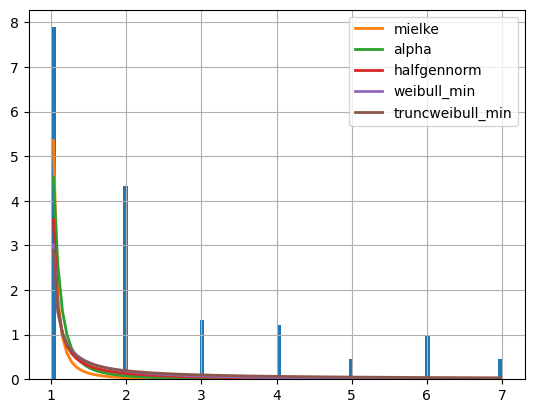

In [17]:
df = pd.read_csv('data.csv', parse_dates=['ÁªìÊùüÊó•Êúü'])
data = pd.Series(df['ÁªìÊùüÊó•Êúü'])

data = data.groupby(data).count()

# # Remove outlier
# # data = data[np.abs(stats.zscore(data)) < 3]

# Plot original
ax = data.hist(bins=20, grid=False)
ax.set_xlim(0, 10)
plt.xticks(np.arange(0, 10, 1))
ax.plot()

f = Fitter(data.values)
f.fit()
f.summary()

ÊØîËµõÂú∫Ê¨°Á¨¶ÂêàmielkeÂàÜÂ∏É
$$
f(x;k,s) = \frac{ky^{k-1}}{(1+y^s)^{1+k/s}} * \frac{1}{\lambda}, y = \frac{x-m}{\lambda}
$$

In [18]:
dist_matches_per_day = st.mielke
params = dist_matches_per_day.fit(data)
k, s, loc, scale = params
params

(0.336211609927385, 1.164278401205293, 0.9999999999999999, 0.16550677485072507)

In [24]:
x = symbols('x') # x‰∏∫‰∫∫Êï∞

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.laplace_asymmetric.html#scipy.stats.laplace_asymmetric
y = (x - loc) / scale
f_matches_per_day = (k * y ** (k-1)) / ((1 + y ** s) ** (1 + k / s)) / scale

f_matches_per_day

0.0414091948946438/((x - 1.0)**0.663788390072615*((x - 1.0)**1.16427840120529 + 0.123164083785171)**1.28877252174336)

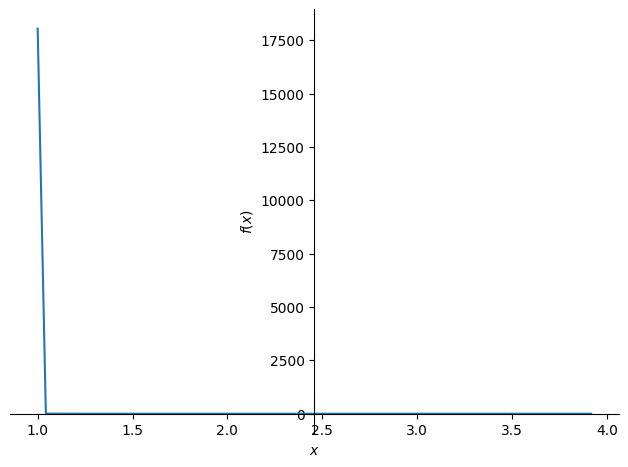

In [25]:
min = dist_matches_per_day.ppf(0.01, k, s, loc = loc, scale = scale)
max = dist_matches_per_day.ppf(0.99, k, s, loc = loc, scale = scale)
plot(f_matches_per_day, (x, min, max), nb_of_points=4000)

In [36]:
dist_matches_per_day.ppf(0.95, *params)

1.6757689220049836

95%Ê¶ÇÁéáÂÜÖÊØèÂ§©ÊúÄÂ§ö1.7Âú∫ÊØîËµõ

In [41]:
dist = dist_matches_per_day(*params)
number_of_matches_per_day_mean = dist.expect()
number_of_matches_per_day_mean

1.3292497874872218

ÊØèÊó•ÊØîËµõÂú∫Ê¨°ÁöÑÊï∞Â≠¶ÊúüÊúõ‰∏∫ 1.329 Âú∫

# ÊäÄÊúØÊîØÊåÅ

[ 0.66452924 -0.0956235 ]


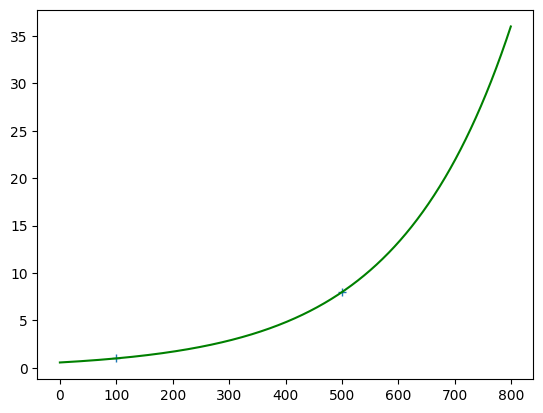

In [33]:
# ÂÅáËÆæÊäÄÊúØÊîØÊåÅÂ∑•Êó∂‰ª•ÂèÇËµõ‰∫∫Êï∞ÊåáÊï∞Âûã‰∏äÊ∂® y = a0e^(a1x)+a2
a1 = 0.005 # Èô°Â≥≠Á≥ªÊï∞

def target_func(x, a0, a2):
  return a0 * np.exp(a1*x) + a2

# ÂÅáËÆæ 100‰∫∫ÊØîËµõ 1Â∑•Êó∂Ôºå 500‰∫∫ÊØîËµõ8Â∑•Êó∂
tech_support_x = [100, 500]
tech_support_y = [1, 8]

fig, tech_ax = plt.subplots()
tech_ax.plot(tech_support_x, tech_support_y, '+')
para, cov = optimize.curve_fit(target_func, tech_support_x, tech_support_y)
print(para)
tech_x = range(0, 800)
tech_y = [target_func(a, *para) for a in tech_x]
tech_ax.plot(tech_x, tech_y, 'g')

In [29]:
a0 = 0.66452924
a2 = -0.0956235

f_tech_support = a0 * exp(a1 * x) + a2

f_tech_support

0.66452924*exp(0.005*x) - 0.0956235

In [42]:
# ÊØîËµõÊäÄÊúØ‰∫∫ÂëòÊîØÊåÅ‰∫∫Êï∞Â∑•Êó∂ÊúüÊúõ

sympy.integrate(f_number_of_participants * f_tech_support * number_of_matches_per_day_mean, (x, -oo, oo))

6.43165138321867

ÊïÖÔºå‰ªÖÈúÄ6.4Â∑•Êó∂/Â§©Âç≥ÂèØÊîØÊåÅ2023Âπ¥ÊØîËµõ

# ÂÆûÊñΩ‰∫∫Âëò

[ 2.16202468 -1.67673104]


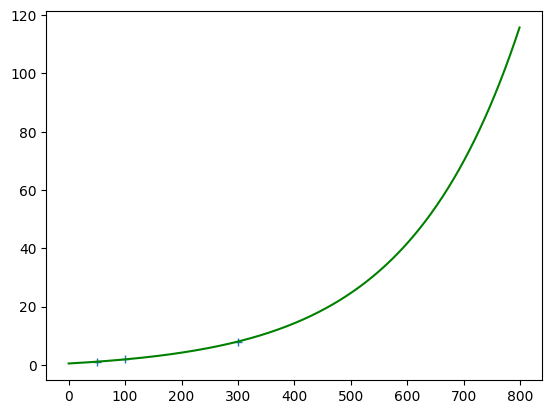

In [46]:
# ÂÅáËÆæÂÆûÊñΩ‰∫∫ÂëòÂ∑•Êó∂‰ª•ÂèÇËµõ‰∫∫Êï∞ÊåáÊï∞Âûã‰∏äÊ∂® y = a0e^(a1x)+a2
a1 = 0.005 # Èô°Â≥≠Á≥ªÊï∞

def target_func(x, a0, a2):
  return a0 * np.exp(a1*x) + a2

# ÂÅáËÆæ 50‰∫∫ÊØîËµõ1Â∑•Êó∂Ôºå100‰∫∫ÊØîËµõ2Â∑•Êó∂Ôºå 300‰∫∫ÊØîËµõ8Â∑•Êó∂
tech_support_x = [50, 100, 300]
tech_support_y = [1, 2, 8]

fig, tech_ax = plt.subplots()
tech_ax.plot(tech_support_x, tech_support_y, '+')
para, cov = optimize.curve_fit(target_func, tech_support_x, tech_support_y)
print(para)
tech_x = range(0, 800)
tech_y = [target_func(a, *para) for a in tech_x]
tech_ax.plot(tech_x, tech_y, 'g')

In [47]:
a0, a2 = para

f_general_support = a0 * exp(a1 * x) + a2

f_general_support

2.16202468458986*exp(0.005*x) - 1.67673104373042

In [48]:
# ÊØîËµõÂÆûÊñΩ‰∫∫ÂëòÂ∑•Êó∂ÊúüÊúõ

sympy.integrate(f_number_of_participants * f_general_support * number_of_matches_per_day_mean, (x, -oo, oo))

19.1099184813064

‰ª•8Â∑•Êó∂/Â§©ËÆ°ÔºåÊúÄÂ§öÈúÄ3‰∫∫Âç≥ÂèØÊîØÊåÅ2023Âπ¥ÊØîËµõ